# Modification to plot a square in the complex palne with center in (z_c_r, z_c_i) and of size zw x zh 

Modfied from Fractals with Python - The Newton Set https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/
from the Fractals with Python series https://blog.anvetsu.com/tags/fractal/

German Hernandez

![picture](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Z3_1centermap.png)

In [2]:
import math
import cmath
import matplotlib.pyplot as plt
import numpy as np

h = 1e-7 # step size for numerical derivative

def f(z):#1
    return z ** 3 - 2 * z + 2

def s(z):#2
    return (z ** 6) + (z ** 3) - 1

def g(z):#3
    return ( z ** 5 ) - ( 3j * (z ** 3) ) - ( ( 5 + ( 2j ) ) * ( 3 * ( z ** 2 ) ) ) + ( 3 * z ) + 1

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256, me = 0):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    if me == 1:
                        dz = (f(z + complex(h, h)) - f(z)) / complex(h, h)
                    if me == 2:
                        dz = (s(z + complex(h, h)) - s(z)) / complex(h, h)
                    if me == 3:
                        dz = (g(z + complex(h, h)) - g(z)) / complex(h, h)
                    if me == 4:
                        dz = (t(z + complex(h, h)) - t(z)) / complex(h, h)
                    
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                    if me==1:
                        znext = z - f(z) / dz # Newton iteration
                    if me==2:
                        znext = z - s(z) / dz # Newton iteration
                    if me==3:
                        znext = z - g(z) / dz # Newton iteration
                    if me==4:
                        znext = z - t(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext
                
                if me ==1:
                    r1 = -1.7693
                    r2 = 0.88465 - 0.58974j
                    r3 = 0.88465 + 0.58974j
                    # Pixels colored using the roots
                    if abs(z-r1)<eps:
                        # color blue
                        pixels[height-y-1,x] = (0, 0, 255 - count*multcol)
                    elif abs(z-r2)<=eps:
                        # color green
                        pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                    elif abs(z-r3)<=eps:
                        # color yellow
                        pixels[height-y-1,x] = (255 - count*multcol, 255 - count*multcol, 0)
                    else:   
                        # color red
                        pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                if me ==2:
                    r1 = -1 * ( (1/2)+(math.sqrt(5) / 2) )**(1/3)
                    r2 = ( (math.sqrt(5) / 2) - (1/2) )**(1/3)
                    r3 = ( (1/2)*(-1 - math.sqrt(5)) )**(1/3)
                    r4 = -1 * (1/2)**(1/3) * ( -1 - math.sqrt(5) )**(1/3)
                    r5 = -( (1/2)*(1 - math.sqrt(5)) )**(1/3)
                    r6 = (-1)**(2/3) * ( (1/2)*(math.sqrt(5)-1) )**(1/3)
                    # Pixels colored using the roots
                    if abs(z-r1)<eps:
                        # color withe
                        pixels[height-y-1,x] = (255 - count*multcol, 255 - count*multcol, 255 - count*multcol)
                    elif abs(z-r2)<=eps:
                        # color green
                        pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                    elif abs(z-r3)<=eps:
                        # color pink
                        pixels[height-y-1,x] = (255 - count*multcol, 0, 255 - count*multcol)
                    elif abs(z-r4)<eps:
                        # color red
                        pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                    elif abs(z-r5)<eps:
                        # color blue
                        pixels[height-y-1,x] = (0, 0, 255 - count*multcol)
                    else:
                        # color yellow
                         pixels[height-y-1,x] = (255 - count*multcol, 255 - count*multcol, 0)
                if me ==3:
                    r1 = -1.38644 - 2.48577j
                    r2 = -1.28471 + 1.80502j
                    r3 = -0.173235 + 0.0198401j
                    r4 = 0.332086 - 0.098899j
                    r5 = 2.5123 + 0.759804j
                    # Pixels colored using the roots
                    if abs(z-r1)<eps:
                        # color red
                        pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                    elif abs(z-r2)<=eps:
                        # color green
                        pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                    elif abs(z-r3)<=eps:
                        # color blue
                        pixels[height-y-1,x] = (0, 0, 255 - count*multcol)
                    elif abs(z-r4)<eps:
                        # color yellow
                        pixels[height-y-1,x] = (255 - count*multcol, 255 - count*multcol, 0)
                    elif abs(z-r5)<eps:
                        # color pink
                        pixels[height-y-1,x] = (255 - count*multcol, 0,255 - count*multcol)
                    else:
                        # color ligth blue
                        pixels[height-y-1,x] = (0, 255 - count*multcol, 255 - count*multcol)
 
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256, me = 0):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter, me = me)
    plt.title('Newton Fractal f(z)=z**3-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

# Fractal 1

## $f(z) = z^{2}-2z+2$

### Plot:

Text(0, 0.5, 'f(z)')

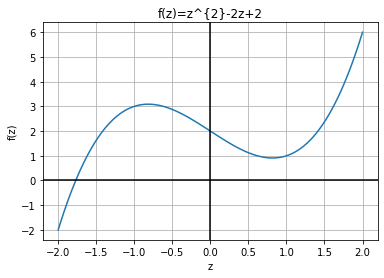

In [111]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(z)=z^{2}-2z+2')
plt.xlabel('z')
plt.ylabel('f(z)')

### Newton Fractal:

zoom out
Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


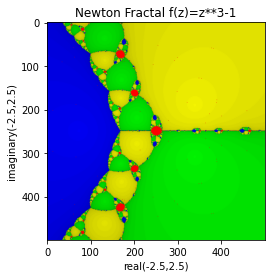

In [112]:
print("zoom out")
display1(zoom=5, me = 1)

### Newton iterates form z=10.0 + 0.0j

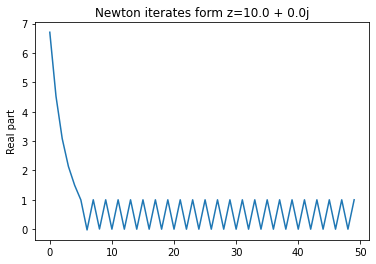

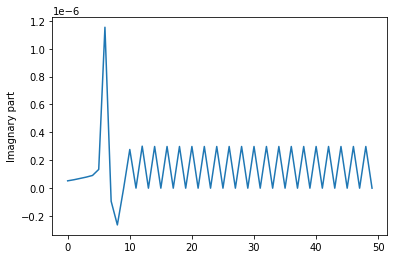

No Converge. Se Mueve De Forma Lineal Entre 0 Y 1 Para Su Parte Real Y Entre Y 0.3 Para Su Parte Compleja


In [4]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
    dz = (f(z + complex(h, h)) - f(z)) / complex(h, h)
    z = z - f(z) / dz # Newton iteration
    r.append(np.real(z))
    i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()
#10 0 - -10 10 - -10 -10 - 0 0 
print("No converge. Se mueve de forma lineal entre 0 y 1 para su parte real y entre y 0.3 para su parte compleja".title())

### Newton iterates form z=-10.0 + 10.0j

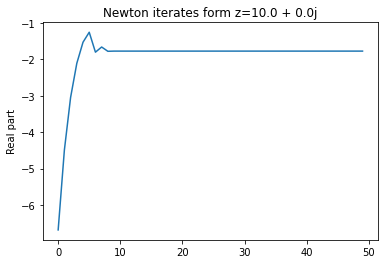

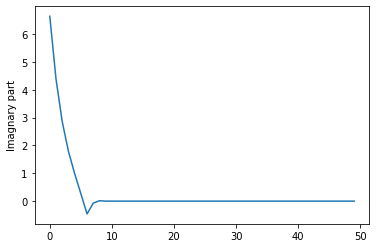

Converge. A 2.3 En Su Parte Real Y A 0 Para Su Parte Compleja


In [5]:
z=-10.0 + 10.0j
r=[]
i=[]
for k in range(50):
    dz = (f(z + complex(h, h)) - f(z)) / complex(h, h)
    z = z - f(z) / dz # Newton iteration
    r.append(np.real(z))
    i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()
#10 0 - -10 10 - -10 -10 - 0 0 
print("Converge. A 2.3 en su parte real y a 0 para su parte compleja".title())

### Newton iterates form z=-10.0 + -10.0j

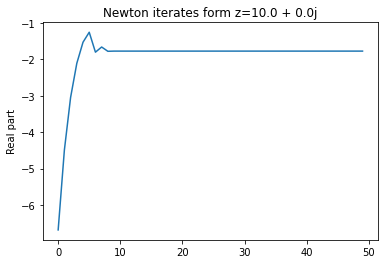

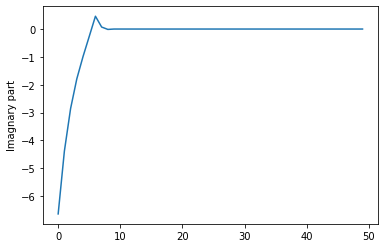

Converge. A 2.3 En Su Parte Real Y A 0 Para Su Parte Compleja


In [6]:
z=-10.0 + -10.0j
r=[]
i=[]
for k in range(50):
    dz = (f(z + complex(h, h)) - f(z)) / complex(h, h)
    z = z - f(z) / dz # Newton iteration
    r.append(np.real(z))
    i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()
#10 0 - -10 10 - -10 -10 - 0 0 
print("Converge. A 2.3 en su parte real y a 0 para su parte compleja".title())

### Newton iterates form z=0.0 + 0.0j

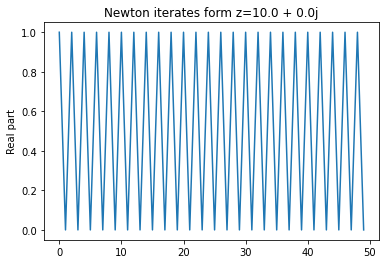

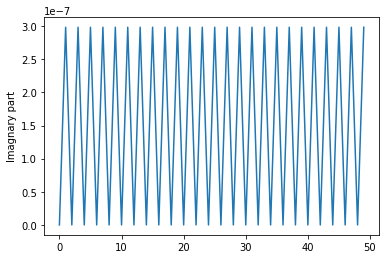

No Converge. Se Mueve De Forma Lineal Entre 0 Y 1 Para Su Parte Real Y Para Su Parte Compleja Entre 0 Y 3


In [7]:
z=0.0 + 0.0j
r=[]
i=[]
for k in range(50):
    dz = (f(z + complex(h, h)) - f(z)) / complex(h, h)
    z = z - f(z) / dz # Newton iteration
    r.append(np.real(z))
    i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()
#10 0 - -10 10 - -10 -10 - 0 0 
print("No converge. Se mueve de forma lineal entre 0 y 1 para su parte real y para su parte compleja entre 0 y 3".title())

# Fractal 2

## $f(z) = z^{6}+z^{3}-1$

### Plot:

Text(0, 0.5, 'f(z)')

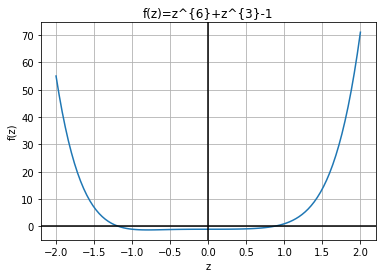

In [117]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,s(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(z)=z^{6}+z^{3}-1')
plt.xlabel('z')
plt.ylabel('f(z)')

### Newton Fractal:

zoom out
Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


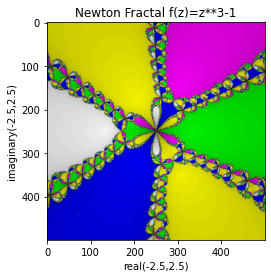

In [118]:
print("zoom out")
display1(zoom=5, me = 2)

### Newton iterates form z=10.0 + 0.0j

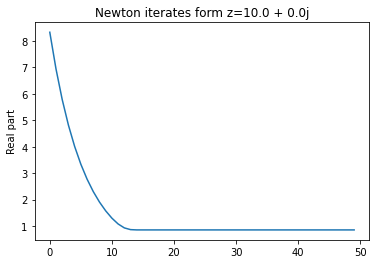

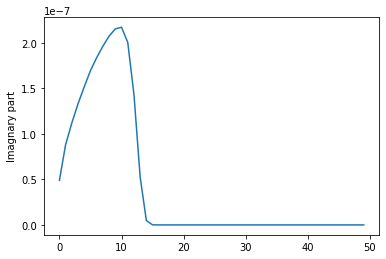

Converge. A 1 En Su Parte Real Y A 0 Para Su Parte Compleja


In [8]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
    dz = (s(z + complex(h, h)) - s(z)) / complex(h, h)
    z = z - s(z) / dz # Newton iteration
    r.append(np.real(z))
    i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()
#10 0 - -10 10 - -10 -10 - 0 0 
print("Converge. A 1 en su parte real y a 0 para su parte compleja".title())

### Newton iterates form z=-10.0 + 10.0j

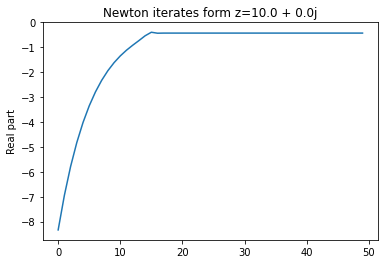

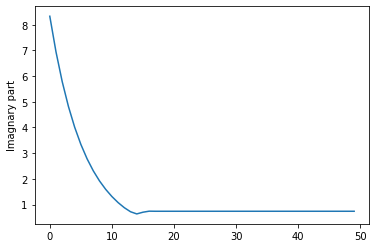

Converge. A -0.5 En Su Parte Real Y A 1 Para Su Parte Compleja


In [9]:
z=-10.0 + 10.0j
r=[]
i=[]
for k in range(50):
    dz = (s(z + complex(h, h)) - s(z)) / complex(h, h)
    z = z - s(z) / dz # Newton iteration
    r.append(np.real(z))
    i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()
#10 0 - -10 10 - -10 -10 - 0 0 
print("Converge. A -0.5 en su parte real y a 1 para su parte compleja".title())

### Newton iterates form z=-10.0 + -10.0j

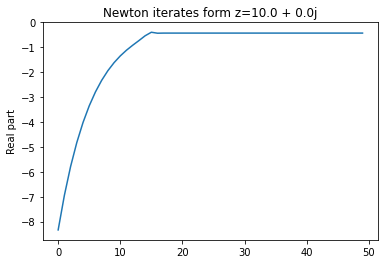

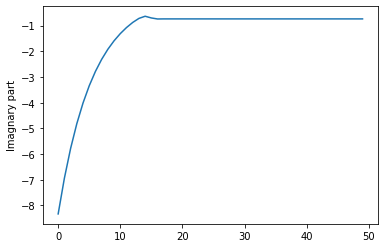

Converge. A -0.5 En Su Parte Real Y A -0.9 Para Su Parte Compleja


In [10]:
z=-10.0 + -10.0j
r=[]
i=[]
for k in range(50):
    dz = (s(z + complex(h, h)) - s(z)) / complex(h, h)
    z = z - s(z) / dz # Newton iteration
    r.append(np.real(z))
    i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()
#10 0 - -10 10 - -10 -10 - 0 0 
print("Converge. A -0.5 en su parte real y a -0.9 para su parte compleja".title())

### Newton iterates form z=0.0 + 0.0j

In [11]:
z=0.0 + 0.0j
r=[]
i=[]
for k in range(50):
    dz = (s(z + complex(h, h)) - s(z)) / complex(h, h)
    z = z - s(z) / dz # Newton iteration
    r.append(np.real(z))
    i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()
#10 0 - -10 10 - -10 -10 - 0 0 
print("Diverge".title())

ZeroDivisionError: complex division by zero

Diverge

# Fractal 3

## $f(z) = z^{5}-3iz^{3}-(5+2i)z^{2}+3z+1$

### Plot:

c:\users\dcort\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'f(z)')

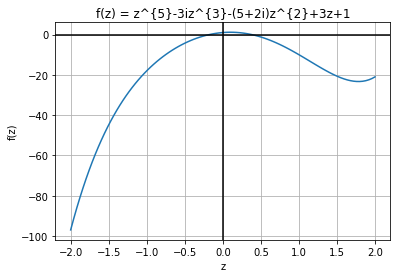

In [123]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,g(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(z) = z^{5}-3iz^{3}-(5+2i)z^{2}+3z+1')
plt.xlabel('z')
plt.ylabel('f(z)')

### Newton Fractal:

zoom out
Z region from ( -5.0 , -5.0 ) to ( 5.0 , 5.0 )


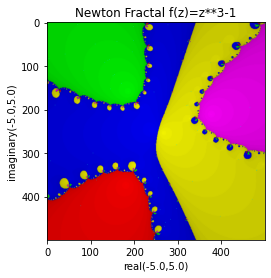

In [124]:
print("zoom out")
display1(zoom=10, me = 3)

### Newton iterates form z=10.0 + 0.0j

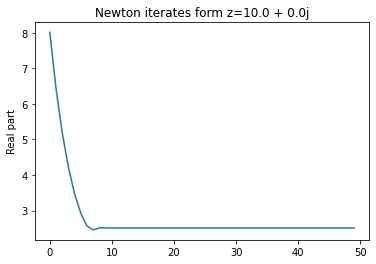

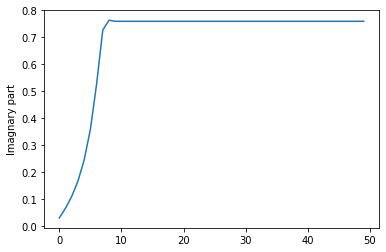

Converge. A 2.5 En Su Parte Real Y A 0.75 Para Su Parte Compleja


In [12]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
    dz = (g(z + complex(h, h)) - g(z)) / complex(h, h)
    z = z - g(z) / dz # Newton iteration
    r.append(np.real(z))
    i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()
print("Converge. A 2.5 en su parte real y a 0.75 para su parte compleja".title())

### Newton iterates form z=-10.0 + 10.0j

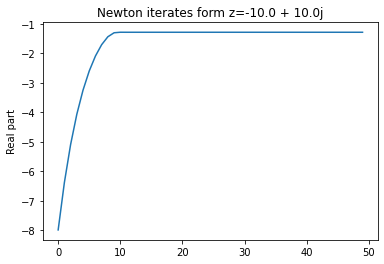

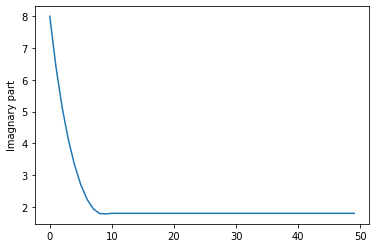

Converge. A -1.5 En Su Parte Real Y A 2 Para Su Parte Compleja


In [13]:
z=-10.0 +10.0j
r=[]
i=[]
for k in range(50):
    dz = (g(z + complex(h, h)) - g(z)) / complex(h, h)
    z = z - g(z) / dz # Newton iteration
    r.append(np.real(z))
    i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()
print("Converge. A -1.5 en su parte real y a 2 para su parte compleja".title())

### Newton iterates form z=-10.0 -10.0j

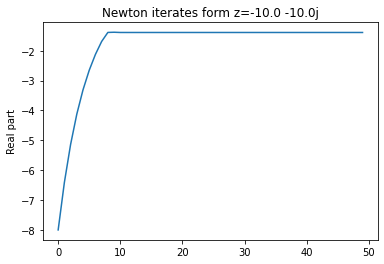

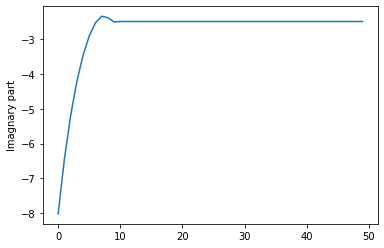

Converge. A -1.5 En Su Parte Real Y A -2.5 Para Su Parte Compleja


In [14]:
z=-10.0 -10.0j
r=[]
i=[]
for k in range(50):
    dz = (g(z + complex(h, h)) - g(z)) / complex(h, h)
    z = z - g(z) / dz # Newton iteration
    r.append(np.real(z))
    i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 -10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()
print("Converge. A -1.5 en su parte real y a -2.5 para su parte compleja".title())

### Newton iterates form z=0.0 + 0.0j

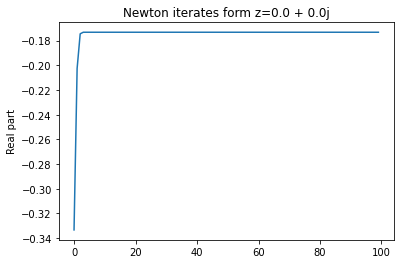

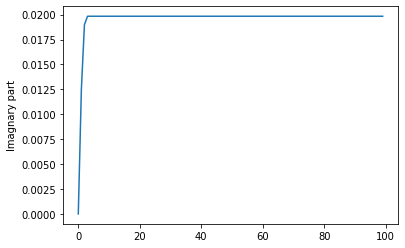

Converge. A -0.18 En Su Parte Real Y A -0.2 Para Su Parte Compleja


In [15]:
z=0.0 + 0.0j
r=[]
i=[]
for k in range(100):
    dz = (g(z + complex(h, h)) - g(z)) / complex(h, h)
    z = z - g(z) / dz # Newton iteration
    r.append(np.real(z))
    i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()
print("Converge. A -0.18 en su parte real y a -0.2 para su parte compleja".title())